In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.drop(['day','month', 'year'], axis = 1, inplace = True)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [12]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [15]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [17]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [18]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

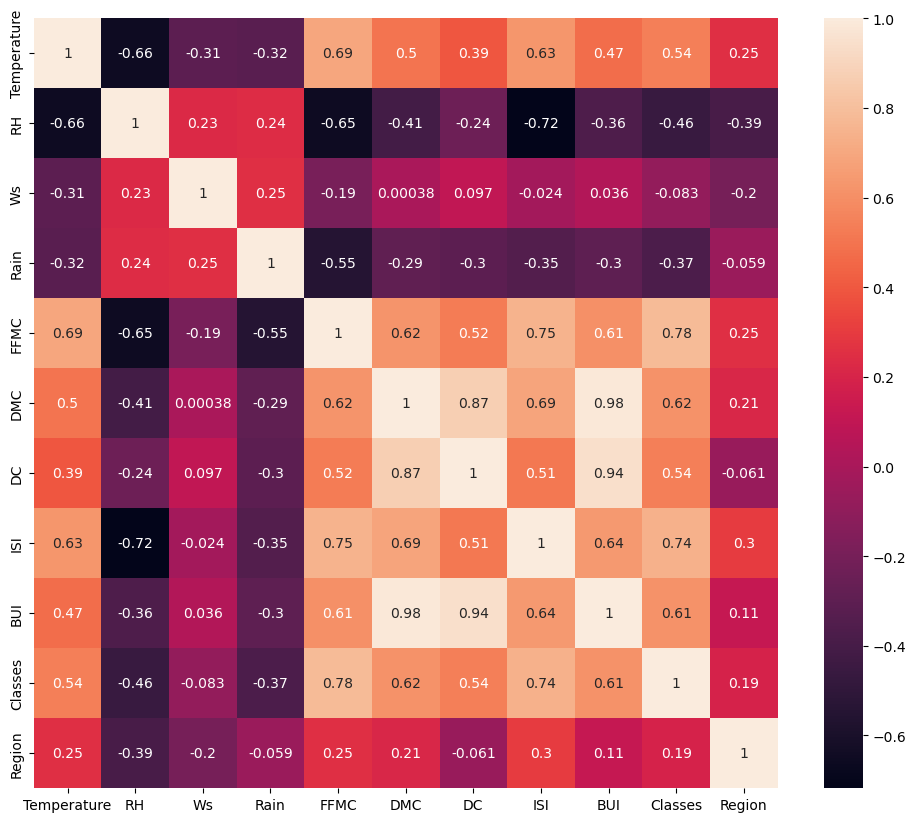

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)


In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(x_train, 0.85)

In [24]:
corr_features

{'BUI', 'DC'}

In [25]:
x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

# Feature Scailing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Box plot to understand outliers

/tmp/ipykernel_1076/3887947870.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


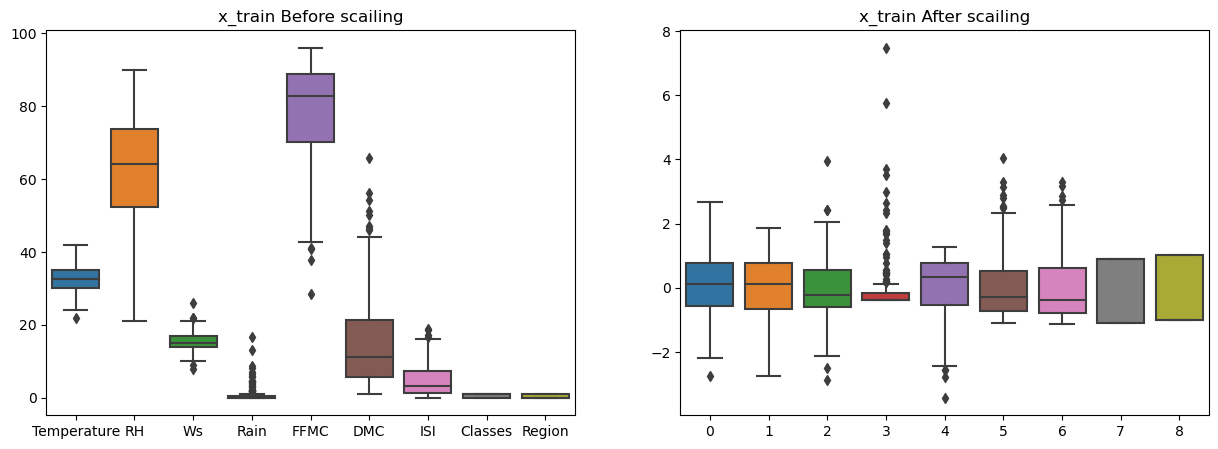

In [30]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before scailing')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After scailing');

# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 0.5468236465249985
R2 Score 0.9847657384266951


# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 1.133175994914409
R2 Score 0.9492020263112388


# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 0.5642305340105692
R2 Score 0.9842993364555513


# ElasticNet

In [36]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
en.fit(x_train_scaled, y_train)
y_pred = en.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error', mae)
print('R2 Score', score)

Mean Absolute Error 1.8822353634896005
R2 Score 0.8753460589519703


In [37]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))